In [333]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import wastingtime

%matplotlib inline

In [364]:
roster = atusrost[['TUCASEID','TULINENO', 'TEAGE', 'TESEX']].copy()
respondent = atusresp[['TUCASEID','TULINENO','TEHRFTPT', 'TRTEC', 'TRTFRIEND', 'TRCHILDNUM']]
activity = atusact[['TUCASEID', 'TUACTDUR24', 'TRTEC_LN', 'TUTIER1CODE', 'TUTIER2CODE', 'TUTIER1CODE']]
roster_elder = atusrostec[['TUCASEID', 'TULINENO', 'TEAGE_EC', 'TEELDUR', 'TEELWHO']]

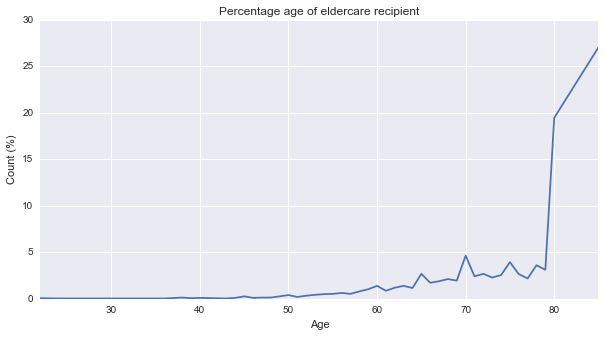

In [335]:
group_by_age = roster_elder.groupby(['TEAGE_EC']).size()
percentage_of_recipient = group_by_age/len(roster_elder['TEAGE_EC'])*100
ax = percentage_of_recipient.plot(title = 'Percentage age of eldercare recipient', figsize=(10,5))
ax.set_xlabel("Age")
ax.set_ylabel("Count (%)")

This graph indicates the percentage of age of eldercare recipents. As shown above, majority of the person being taken care of is 80 years and older.

In [336]:
give_care_to = elder_care.groupby(['TEELWHO']).size()
give_care_to = pd.DataFrame(give_care_to, columns=['TOT_TEEL'])

(-1.25, 1.25, -1.25, 1.25)

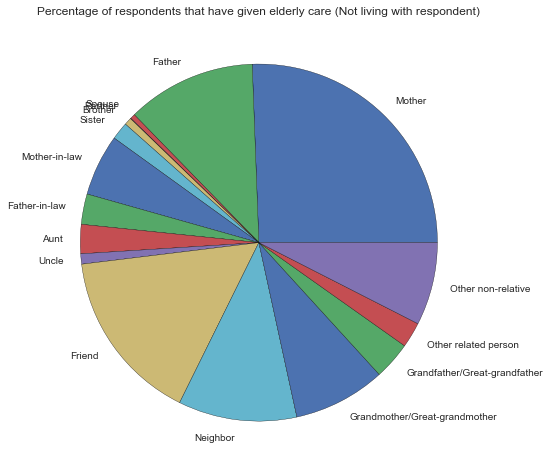

In [337]:
not_living_respondent = give_care_to[9:]

weighted_not_living_respondent = not_living_respondent['TOT_TEEL']/2692
w = weighted_not_living_respondent.plot(kind='pie',
                                    title = 'Percentage of respondents that have given elderly care (Not living with respondent)', 
                                    figsize=(8,8),  
                                    legend=False,
                                    labels=['Mother', 
                                             'Father', 
                                             'Spouse', 
                                             'Partner', 
                                             'Brother', 
                                             'Sister',
                                             'Mother-in-law',
                                             'Father-in-law',
                                             'Aunt',
                                             'Uncle',
                                             'Friend',
                                             'Neighbor',
                                             'Grandmother/Great-grandmother',
                                             'Grandfather/Great-grandfather',
                                             'Other related person',
                                             'Other non-relative'])

w.axis('off')

The respondents have said they have given elderly care to their mother followed by their friend and neigbour/father. This could mean the respondent could have went to visit their recipent at a nursing home or at the recipents home or perhaps helped their neighbour with some elderly care.

TEELWHO
20    38.153846
21     1.230769
22     1.230769
24    40.000000
25     0.923077
26    14.461538
28     0.307692
29     0.307692
30     3.384615
Name: TOT_TEEL, dtype: float64

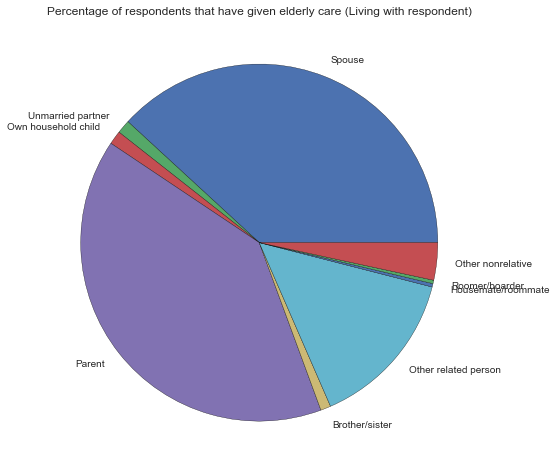

In [338]:
living_w_respondent = give_care_to[:9]
weighted_living_w_respondent = living_w_respondent['TOT_TEEL']/325 * 100
wl = weighted_living_w_respondent.plot(kind='pie',
                                    title = 'Percentage of respondents that have given elderly care (Living with respondent)', 
                                    figsize=(8,8),  
                                    legend=False,
                                    labels=['Spouse', 
                                             'Unmarried partner', 
                                             'Own household child', 
                                             'Parent',
                                             'Brother/sister',
                                             'Other related person',
                                             'Housemate/roommate',
                                             'Roomer/boarder',
                                             'Other nonrelative'])

wl.axis('off')
weighted_living_w_respondent

Compared to people who were recieving some type of elderly care outside of the respondent's home, we looked at people who are living with their respondent. This chart shows the highest percentage of the respondent taking care of their spouse at 40% and 38% for parents.

In [339]:
main_respondent = roster[roster['TULINENO'] == 1]
elder = pd.merge(pd.merge(main_respondent, elder_care), respondent)

In [355]:
elder['AGE_DIFF'] = (elder['TEAGE'] - elder['TEAGE_EC'])
elder_TRTEC = elder[elder['TRTEC'] > 0]
elder_TRTEC['AGE_DIFF'].mean()

-20.140625

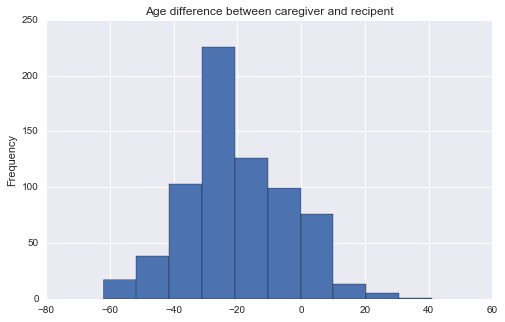

In [362]:
elder_TRTEC['AGE_DIFF'].plot.hist(title = 'Age difference between caregiver and recipent', 
                                    figsize=(8,5))

The negative value indicates the caregiver is younger than the person they are taking care of. The average age difference is about 20 years younger.

In [361]:
duration_of_care = elder.groupby(elder['TEELDUR'])

In [360]:
duration_of_care.size()

TEELDUR
1     582
2     231
3     337
4    1867
dtype: int64

,TUCASEID,TULINENO,TEHRFTPT,TRTEC,TRTFRIEND,TRCHILDNUM
0,20140101140007,1,-1,-1,0,1
1,20140101140011,1,-1,-1,0,1
2,20140101140028,1,-1,-1,0,3
3,20140101140063,1,-1,-1,0,0
4,20140101140168,1,-1,-1,0,1
5,20140101140537,1,-1,-1,0,0
6,20140101140559,1,-1,-1,0,1
7,20140101140610,1,-1,-1,0,1
8,20140101140614,1,2,-1,0,0
9,20140101140639,1,-1,-1,0,0
